In [ ]:
%matplotlib inline


# PCA example with Iris Data-set


Principal Component Analysis applied to the Iris dataset.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.




Automatically created module for IPython interactive environment


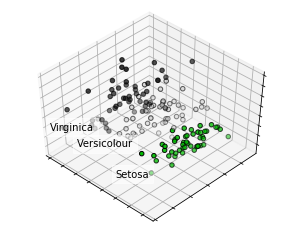

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

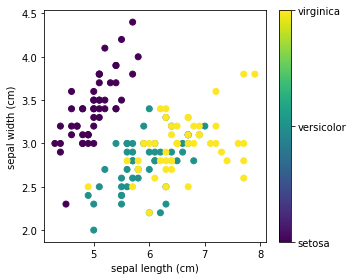

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [0.92461621 0.05301557]


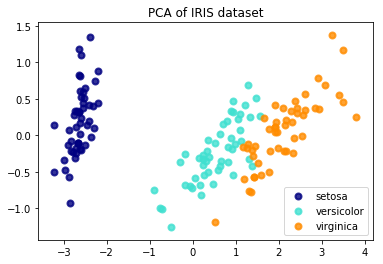

<Figure size 432x288 with 0 Axes>

In [3]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#lda = LinearDiscriminantAnalysis(n_components=2)
#X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
#for color, i, target_name in zip(colors, [0, 1, 2], target_names):
 #   plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
  #              label=target_name)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('LDA of IRIS dataset')

plt.show()

C:\Users\Varsha C\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Varsha C\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


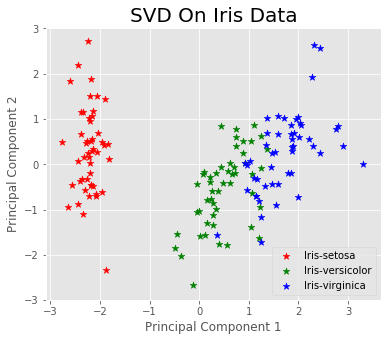

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(6, 5))
 
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
 
X = df.ix[:,0:4].values
y = df.ix[:,4].values
 
 
X_scaled = StandardScaler().fit_transform(X)
 
svd = TruncatedSVD(n_components=2)
Y_fitted = svd.fit_transform(X_scaled)
 
 
for labels, columns in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('red', 'green', 'blue')):
    plt.scatter(Y_fitted[y==labels, 0],Y_fitted[y==labels, 1],label=labels,c=columns,marker='*', s=50)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.title("SVD On Iris Data", fontsize=20)
plt.show()

In [1]:
'''import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
df = pd.read_csv('../input/IRIS.csv')
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df = df.sample(frac=1.0)
df.head(10)'''

"import pandas as pd\nimport numpy as np\nfrom mpl_toolkits.mplot3d import Axes3D\nimport matplotlib.pyplot as plt\ndf = pd.read_csv('../input/IRIS.csv')\ndf['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})\ndf = df.sample(frac=1.0)\ndf.head(10)"